# Stats and Public Health Part I

### Introduction

West Nile Virus is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them. The ciity of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.  

This report aims to study the mosquito dataset from the city of Chicago using basic EDA and Data Wrangling Techniques. First, we must start by importing the required libraries to complete the report. 

---
## Import Libraries and Dataset


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, upload the `csv` dataset to Python.

In [2]:
# Load the dataset

file_path = "Desktop/data/mosquito_data.csv" # replace with your own file path

df = pd.read_csv(file_path) # load the dataset

Now that the dataset file has been imported, we can take a look at the data we're working with to before proceeding with the first step which is cleaning the data. 

---

## PART I - Basic Data Wrangling

In [31]:
df.head() # display first few rows

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [35]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns with  string (categorical), floats and integers.")

We have 18495 rows and 13 columns with  string (categorical), floats and integers.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


### Observations:

From looking at the first few rows of the table, we can determine what we need to do. 

1. We see that the `Lattitude` and `Longitude` columns have missing values (~ 12%)


### Plan:

1. **Formatting:**  
    - Convert `Date` column to `datetime` format.
    - Change data type of `WNV Present` column to `boolean` data type
    
    
2. **Removing Duplicates**

3. **Remove Null Values**

---

**1. Formatting:** 

- Convert the `Date` column to have the appropriate `datetime` format:

In [33]:
df['Date'] = pd.to_datetime(df['Date']) # convert date column to have datetime format


In [34]:
print(df['Mosquito number'].describe()) # describe Mosquito Number column

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64


In [9]:
print(df['Year'].describe()) # describe Year column

count    18495.000000
mean      2012.905812
std          3.725857
min       2007.000000
25%       2010.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64


In [10]:
print(df['Trap type'].value_counts()) # describe Trap Type column

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64


In [11]:
print(df['Species'].value_counts()) # describe Species column

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64


In [30]:
print(df['WNV Present'].value_counts()) # describe Species column

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64


**2. Remove Duplicate Data**


In [12]:
# a True/False array, marking whether a row of data is appearing more than once
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18490    False
18491    False
18492    False
18493    False
18494     True
Length: 18495, dtype: bool

In [13]:
# a True/False array, marking whether a row of data is appearing more than once
df.duplicated().sum()

658

In [14]:
clean_data = df.drop_duplicates() 

In [15]:
# Sanity check
df.shape[0] - clean_data.shape[0]

658

In [16]:
clean_data.duplicated().sum()

0

In [17]:
# Use T for transpose to make the original columns and rows switch, then apply .duplicated()
clean_data.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

**3. Remove Null Values**

In [18]:
clean_data.isnull().any()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                 True
Lon                 True
dtype: bool

In [19]:
# axis = 0 shows summing of rows
clean_data.isna().sum(axis=0)

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [20]:
print(clean_data.isnull().sum())

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64


In [21]:
clean_data.isna().sum(axis=0)/clean_data.shape[0]*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

In [36]:
clean_data['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

In [37]:
clean_data['Lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

In [38]:
# Fill with median

Lat_median = clean_data['Lat'].median()

clean_data.loc[:, "Lat"] = clean_data.loc[:, "Lat"].fillna(Lat_median)

In [39]:
Lon_median = clean_data['Lon'].median()

clean_data.loc[:, "Lon"] = clean_data.loc[:, "Lon"].fillna(Lon_median)

In [40]:
print(clean_data.isnull().sum())

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64


---
## PART II: Basic EDA


Now that we've cleaned the dataset, we can proceed with some basic EDA. We will first look at the number of mosquitoes over the span of the study.

The plot below illustrates the total mosquito number caught over the span of the study, from 2008 - 2019. Each point on the graph represents the sum of mosquitoes caught on a specific date across all traps in Chicago. We can see that the number of mosquitoes caught peaks at cetain points of the year every single year, before dropping back. This is reasonableas increases or decreases in numbers could be related to seasonal changes, weather patterns, or the effectiveness of mosquito control measures.

We can observe fluctuations in mosquito numbers, possibly indicating peak mosquito activity periods. 

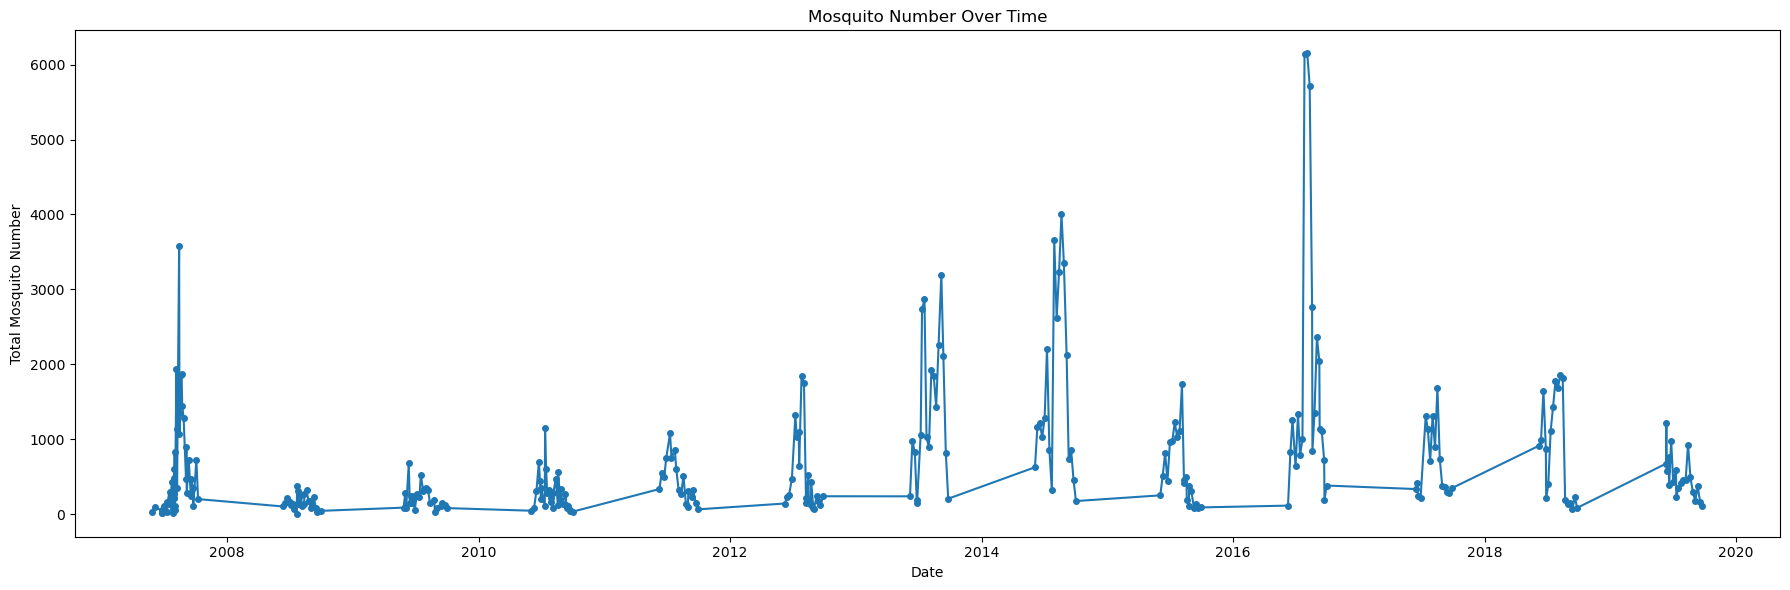

In [44]:

# Grouping data by 'Date' and summing up 'Mosquito number' for each date
date_grouped = df.groupby('Date')['Mosquito number'].sum().reset_index()

# Plotting mosquito number over time
plt.figure(figsize=(18, 6))
plt.plot(date_grouped['Date'], date_grouped['Mosquito number'], marker='o', linestyle='-', markersize=4)
plt.title('Mosquito Number Over Time')
plt.xlabel('Date')
plt.ylabel('Total Mosquito Number')
plt.xticks()
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

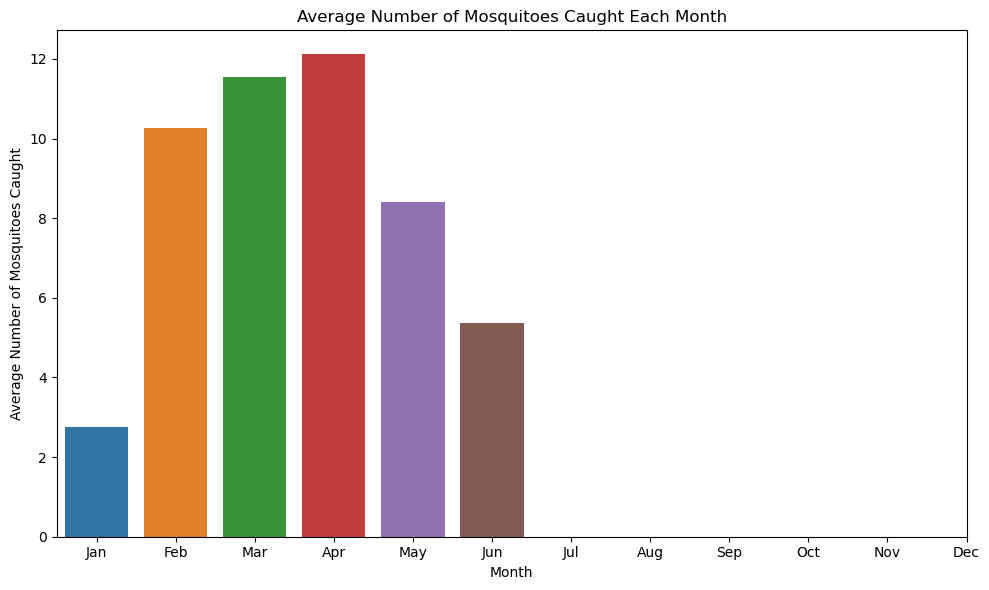

In [45]:
df['Month'] = df['Date'].dt.month

# Calculating the average number of mosquitoes caught each month
monthly_avg = df.groupby('Month')['Mosquito number'].mean().reset_index()

# Plotting the average number of mosquitoes caught each month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='Month', y='Mosquito number')
plt.title('Average Number of Mosquitoes Caught Each Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitoes Caught')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

---
## PART III: Advanced EDA


Let's analyze the data further. We want to explore the following points:

**1. Relationship between mosquito species and WNV prevalence**




**1. Relationship between mosquito species and WNV prevalence**

The plot presents the count of mosquitoes by species, differentiated by the presence of the WNV. It clearly shows which mosquito species are more frequently associated with WNV  which we see herebeing Culex Restuans and Culex Pipens.


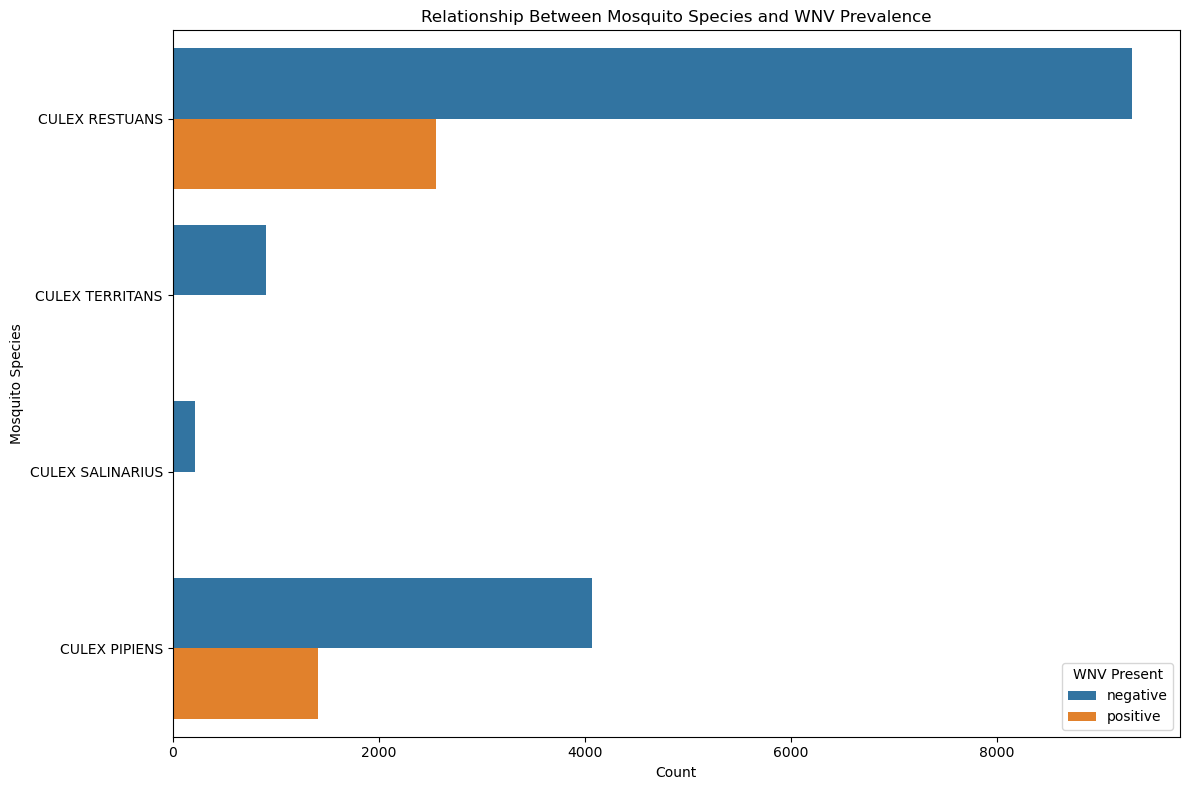

In [26]:
# 1. Relationship between mosquito species and WNV prevalence
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Species', hue='WNV Present')
plt.title('Relationship Between Mosquito Species and WNV Prevalence')
plt.xlabel('Count')
plt.ylabel('Mosquito Species')
plt.legend(title='WNV Present')
plt.tight_layout()
plt.show()

**Relationship Between the Number of Mosquitoes Caught and Trap Type**

The second visual is a boxplot that illustrates the distribution of the number of mosquitoes caught by different trap types. It highlights the variability in mosquito catch rates across different types of traps, indicating how effective each trap type is at capturing mosquitoes. Based on this visual we can see that Sentinel and CDC seem to be the most effective.


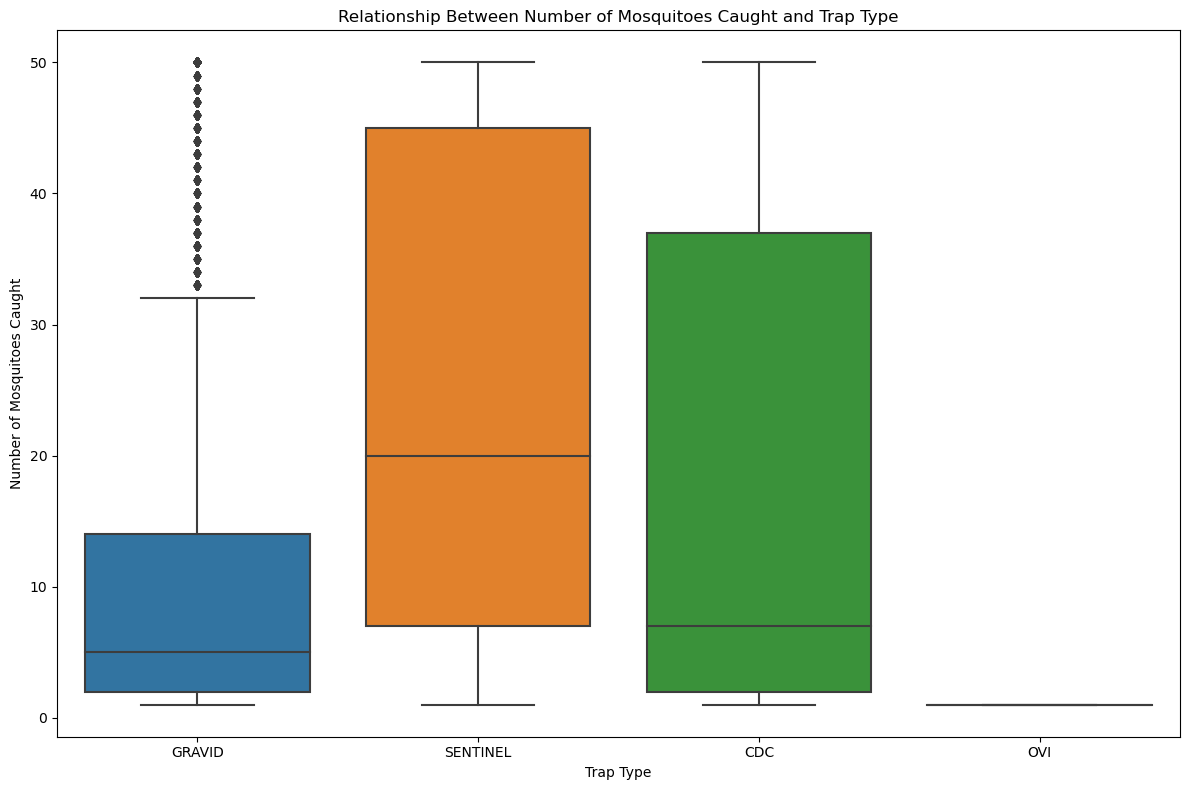

In [28]:
# Relationship between number of Mosquitoes caught and Trap Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Trap type', y='Mosquito number')
plt.title('Relationship Between Number of Mosquitoes Caught and Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Number of Mosquitoes Caught')
plt.tight_layout()
plt.show()


**Yearly Trend of WNV Positive Cases**

The bar plot showing the yearly trend of WNV positive cases and how it has varied year over year, which can be useful for understanding trends over time and preparing for potential outbreaks.


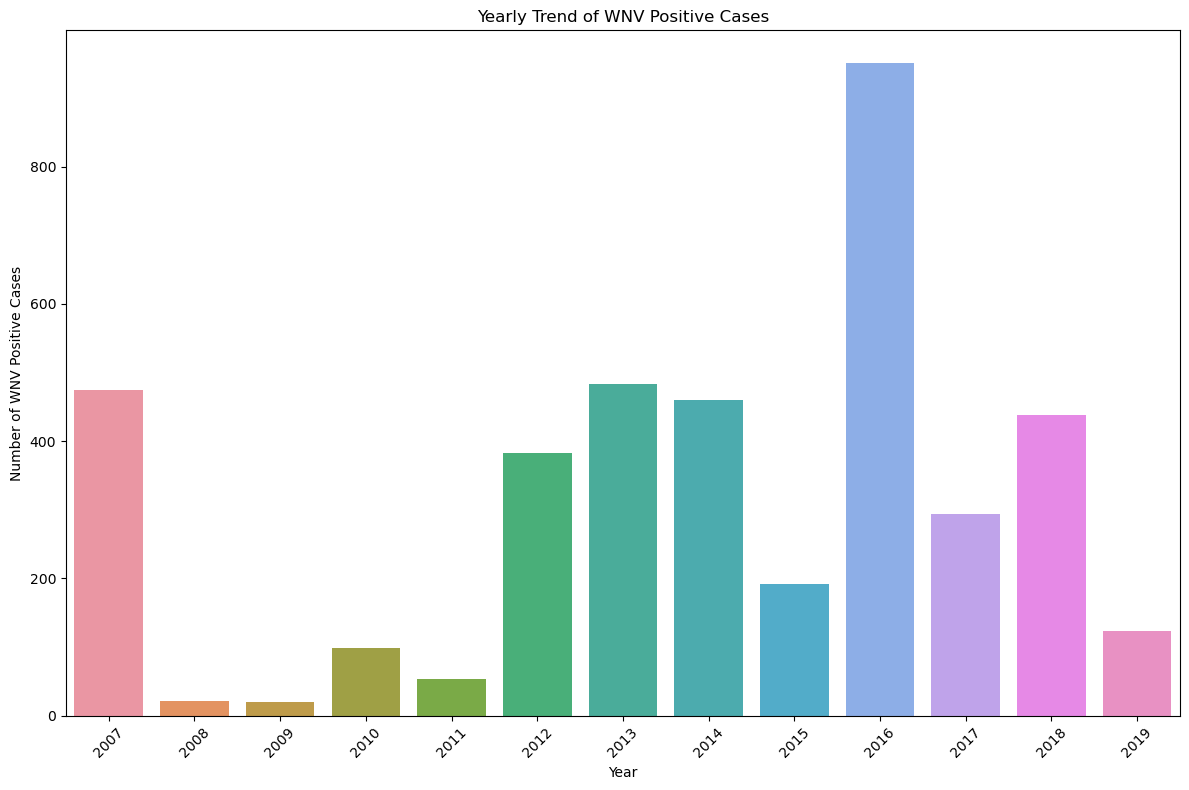

In [46]:
# Additional insight: Yearly trend of WNV presence
wnv_yearly = df.groupby('Year')['WNV Present'].apply(lambda x: (x == 'positive').sum()).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=wnv_yearly, x='Year', y='WNV Present')
plt.title('Yearly Trend of WNV Positive Cases')
plt.xlabel('Year')
plt.ylabel('Number of WNV Positive Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()